In [2]:
# 기본 데이터 분석을 위한 Library
import pandas as pd
import numpy as np

# 시각화 Library
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn에 있는 기본 데이터셋을 가져오기 위한
from sklearn import datasets

# sklearn의 PCA를 통해서 쉽게 PCA 적용가능
from sklearn.decomposition import PCA
# 그렇지 않으면 Matrix만들고 COV 구해서
# eigen_vector, eigen_value를 구해야하는 등 과정이 복잡해진다.

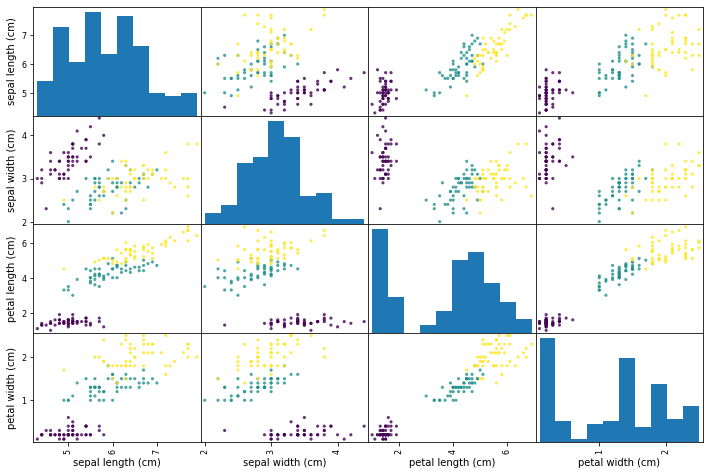

In [3]:
from pandas.plotting import scatter_matrix

#loading dataset
iris = datasets.load_iris()
#creating data frame for pandas
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
scatter_matrix(dataframe, c=iris['target'],marker='o', s=10,alpha=.8, figsize=(12,8))
plt.show()

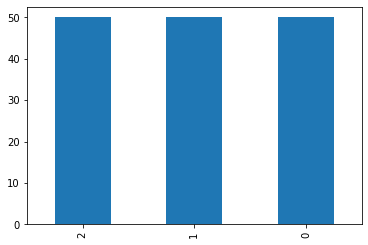

In [4]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

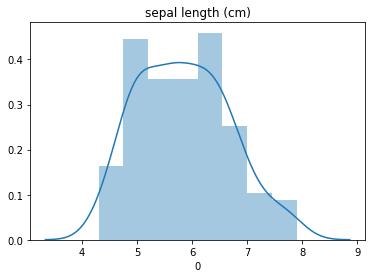

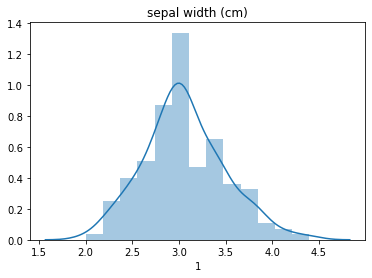

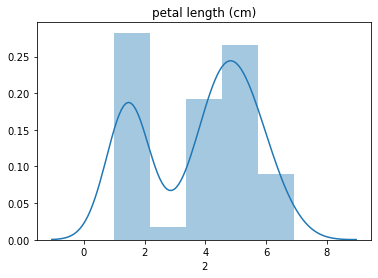

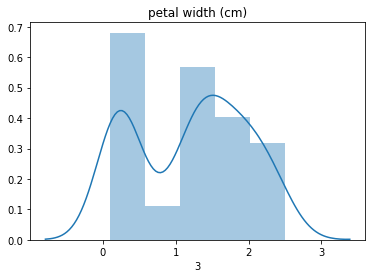

In [5]:
import seaborn as sns
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

In [6]:
# sklearn을 통해서 PCA 객체 생성 및 PC값을 구할 수 있습니다.
pca = PCA()
pca.fit(X)
PC_score = pca.transform(X)
PC_score[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [7]:
# pca의 eigen_vector
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [8]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [9]:
ratio = pca.explained_variance_ratio_
ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0.5, 1.0, 'PCA of IRIS dataset')

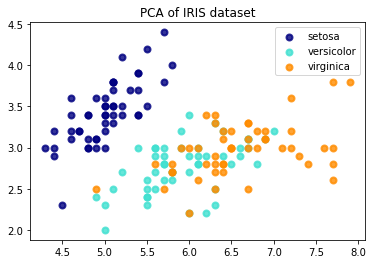

In [11]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

Text(0.5, 1.0, 'PCA of IRIS dataset')

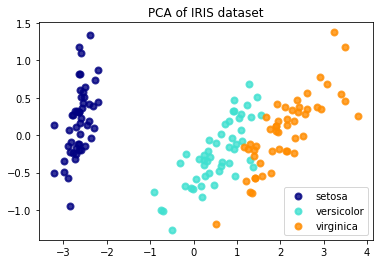

In [12]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(PC_score[y == i, 0], PC_score[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [15]:
clf = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf.fit(X,y)
pred = clf.predict(X)
confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [16]:
clf.fit(PC_score,y)
pred = clf.predict(PC_score)
confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [17]:
clf = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf.fit(X[:,:2],y)
pred = clf.predict(X[:,:2])
confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

In [19]:
clf2 = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf2.fit(PC_score[:,:2],y)
pred = clf2.predict(PC_score[:,:2])
confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)